In [1]:
import numpy as np
import sys
import empymod

sys.path.append('../')

from emulatte.model import earth
from emulatte.source.dipole import VMD

In [2]:
def pos(data):
    """Return positive data; set negative data to NaN."""
    return np.array([x if x > 0 else np.nan for x in data])


def neg(data):
    """Return -negative data; set positive data to NaN."""
    return np.array([-x if x < 0 else np.nan for x in data])

In [3]:
%%time
src = [0,0,0]
rec = [100,0,0]
thicks = []
res = [100]
freq = np.logspace(-1,5, 301)
model = earth.EM1D(thicks)
vmd = VMD(1)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model.set_params(res)
model.set_source(vmd, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model.set_filter(hankel_filter='key201')
EMF = model.field("H", "z", rec, freq)
#emulatte

CPU times: user 902 µs, sys: 285 µs, total: 1.19 ms
Wall time: 1.21 ms


In [4]:
%%time
# Survey parameters
freq = np.logspace(-1, 5, 301)
src = [0, 0, 0, 0, 90]
rec = [100, 0, 0, 0, 90]
depth = 0
res = [2e14, 100]

# Computation
inp = {'src': src, 'rec': rec, 'depth': depth, 'res': res,
       'freqtime': freq, 'verb': 1}
fhz_num = empymod.loop(**inp)
#empymod

CPU times: user 65.8 ms, sys: 12.4 ms, total: 78.2 ms
Wall time: 92.9 ms


TypeError: 'int' object is not subscriptable

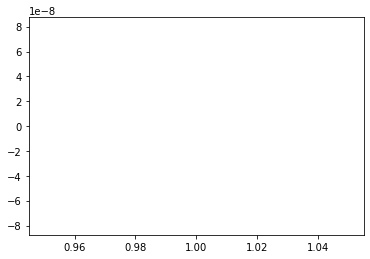

In [5]:
import matplotlib.pyplot as plt

plt.plot(freq, EMF.real, "C0-")
plt.plot(freq, -EMF.real, "C0:")
plt.plot(freq, EMF.imag, "C1-")
plt.plot(freq, -EMF.imag, "C1:")
plt.plot(freq[::10], pos(fhz_num.real)[::10], marker=".", linewidth=0, c='k')
plt.plot(freq[::10], neg(fhz_num.real)[::10], marker=".", linewidth=0, c='k')

plt.plot(freq[::10], pos(fhz_num.imag)[::10], marker=".", linewidth=0, c='k')
plt.plot(freq[::10], neg(fhz_num.imag)[::10], marker=".", linewidth=0, c='k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1, 1e5])
plt.ylim([1e-12, 1e-6])
plt.xlabel('FREQUENCY (Hz)')
plt.ylabel('$H_z$ (A/m)')
plt.legend()

plt.tight_layout()

plt.show()

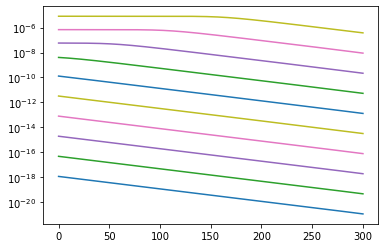

In [ ]:
for i in range(0,100,10):
    plt.plot(model.kernel[:,i].real)
    plt.plot(-model.kernel[:,i].real)
    #plt.plot(model.kernel[:,i].imag)
plt.yscale('log')
plt.show()

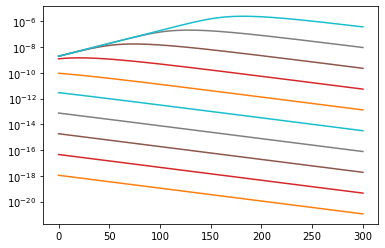

In [ ]:
for i in range(0,100,10):
    #plt.plot(model.kernel[:,i].real)
    plt.plot(model.kernel[:,i].imag)
    plt.plot(-model.kernel[:,i].imag)
plt.yscale('log')
plt.show()

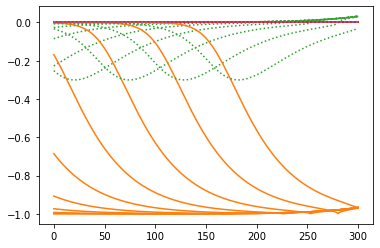

In [ ]:
for i in range(0,100,10):
    plt.plot(model.d_te[:,i].real, "C1-")
    plt.plot(model.d_te[:,i].imag, "C2:")
    plt.plot(model.u_te[:,i].real, "C3-")
    plt.plot(model.u_te[:,i].imag, "C4:")

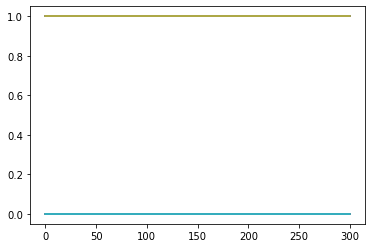

In [ ]:
for i in range(0,100,10):
    plt.plot(model.e_up[:,i].real)
    plt.plot(model.e_up[:,i].imag)
    plt.plot(model.e_down[:,i].real)
    plt.plot(model.e_down[:,i].imag)

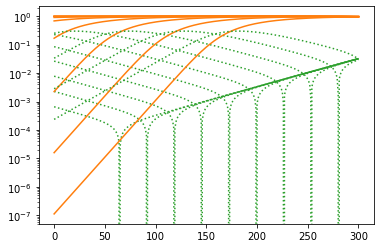

In [ ]:
for i in range(0,100,10):
    plt.plot(model.dr_te[:,0,i].real, "C1-")
    plt.plot(model.dr_te[:,0,i].imag, "C2:")
    plt.plot(model.ur_te[:,0,i].real, "C3-")
    plt.plot(model.ur_te[:,0,i].imag, "C4:")
    plt.plot(-model.dr_te[:,0,i].real, "C1-")
    plt.plot(-model.dr_te[:,0,i].imag, "C2:")
    plt.plot(-model.ur_te[:,0,i].real, "C3-")
    plt.plot(-model.ur_te[:,0,i].imag, "C4:")
plt.yscale('log')

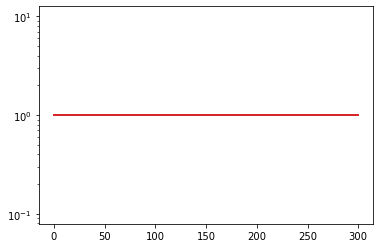

In [ ]:
for i in range(0,100,10):
    plt.plot(model.dr_te[:,1,i].real, "C1-")
    plt.plot(model.dr_te[:,1,i].imag, "C2:")
    plt.plot(model.ur_te[:,1,i].real, "C3-")
    plt.plot(model.ur_te[:,1,i].imag, "C4:")
    plt.plot(-model.dr_te[:,1,i].real, "C1-")
    plt.plot(-model.dr_te[:,1,i].imag, "C2:")
    plt.plot(-model.ur_te[:,1,i].real, "C3-")
    plt.plot(-model.ur_te[:,1,i].imag, "C4:")
plt.yscale('log')

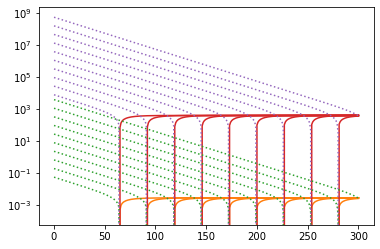

In [ ]:
for i in range(0,100,10):
    plt.plot(model.yuc[:,0,i].real, "C1-")
    plt.plot(model.yuc[:,0,i].imag, "C2:")
    plt.plot(model.zuc[:,0,i].real, "C3-")
    plt.plot(model.zuc[:,0,i].imag, "C4:")
    plt.plot(-model.yuc[:,0,i].real, "C1-")
    plt.plot(-model.yuc[:,0,i].imag, "C2:")
    plt.plot(-model.zuc[:,0,i].real, "C3-")
    plt.plot(-model.zuc[:,0,i].imag, "C4:")
plt.yscale('log')

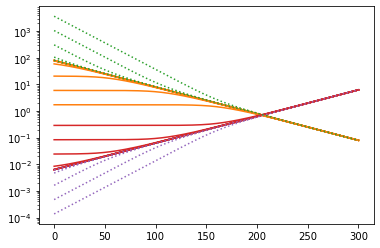

In [ ]:
for i in range(0,100,10):
    plt.plot(model.yuc[:,1,i].real, "C1-")
    plt.plot(model.yuc[:,1,i].imag, "C2:")
    plt.plot(model.zuc[:,1,i].real, "C3-")
    plt.plot(model.zuc[:,1,i].imag, "C4:")
    plt.plot(-model.yuc[:,1,i].real, "C1-")
    plt.plot(-model.yuc[:,1,i].imag, "C2:")
    plt.plot(-model.zuc[:,1,i].real, "C3-")
    plt.plot(-model.zuc[:,1,i].imag, "C4:")
plt.yscale('log')